# **Home task**

### **Linear Regression: Ridge, Lasso, Normal Equation, Polynomial**

#### Use diabetes dataset (sklearn.datasets.load_diabetes) and apply
  * Ridge
  * Lasso
  * Polynomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


### 1. Load and Preprocess Data

In [25]:
# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2. Ridge Regression


Ridge Regression
R2 train score = 0.5276319768458045
R2 test score = 0.45414652070698225
b: 153.73654390934846, 
w= [  1.80734179 -11.44818951  25.73269892  16.73429974 -34.67195409
  17.05307485   3.36991411  11.76426044  31.3783838    2.45813922]
Ridge Regression MSE: 2892.01


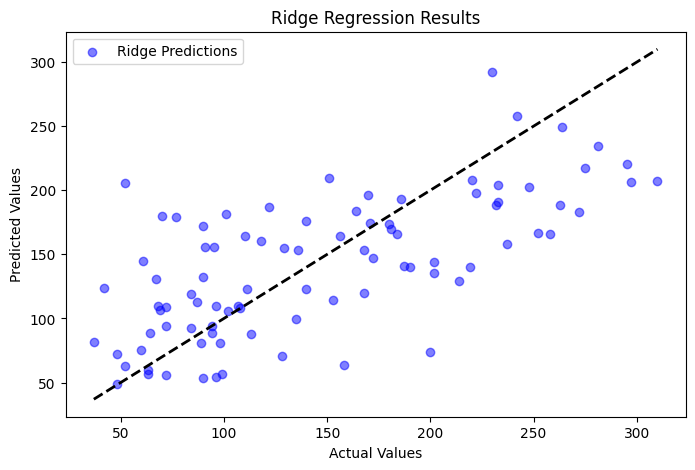

In [26]:
# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Print Ridge Regression results
print('Ridge Regression')
print('R2 train score =', ridge.score(X_train_scaled, y_train))
print('R2 test score =', ridge.score(X_test_scaled, y_test))
print('b: {}, \nw= {}'.format(ridge.intercept_, ridge.coef_))
print(f'Ridge Regression MSE: {ridge_mse:.2f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5, label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Results')
plt.legend()
plt.show()


### 3. Lasso Regression


Lasso Regression
R2 train score = 0.5272214154674504
R2 test score = 0.45554139902790414
b: 153.73654390934846, 
w= [  1.73045056 -11.31635911  25.82462699  16.64425156 -29.35841191
  13.27584411   0.5479479   10.23616805  29.63282611   2.39347521]
Lasso Regression MSE: 2884.62


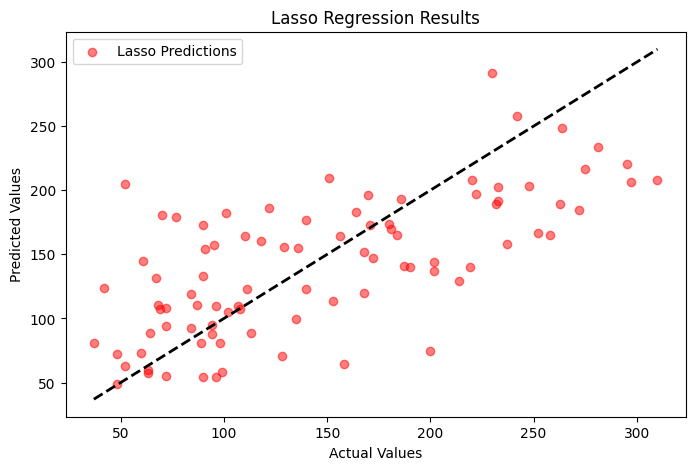

In [27]:
# Apply Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Print Lasso Regression results
print('Lasso Regression')
print('R2 train score =', lasso.score(X_train_scaled, y_train))
print('R2 test score =', lasso.score(X_test_scaled, y_test))
print('b: {}, \nw= {}'.format(lasso.intercept_, lasso.coef_))
print(f'Lasso Regression MSE: {lasso_mse:.2f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5, label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results')
plt.legend()
plt.show()


### 4. Polynomial Regression


Polynomial Regression (degree 2)
R2 train score = 0.6010461011458316
R2 test score = 0.4558192952624657
Polynomial Regression (degree 2) MSE: 2883.15


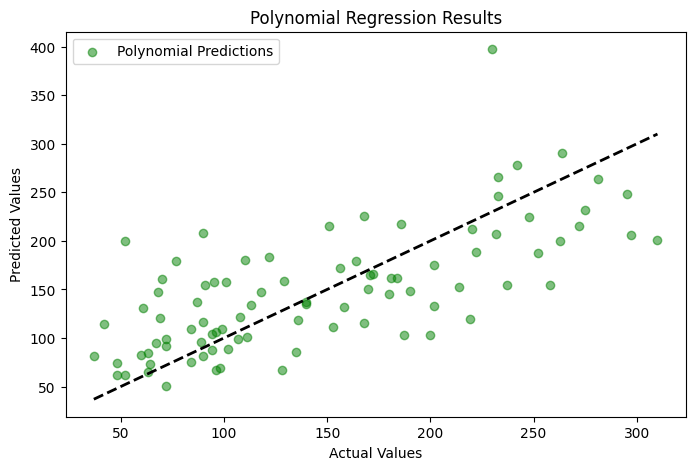

In [31]:
# Apply Polynomial Regression (degree 2) with Ridge regularization
poly = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(alpha=1.0))
poly.fit(X_train_scaled, y_train)
y_pred_poly = poly.predict(X_test_scaled)
poly_mse = mean_squared_error(y_test, y_pred_poly)

# Print Polynomial Regression results
print('Polynomial Regression (degree 2)')
print('R2 train score =', poly.score(X_train_scaled, y_train))
print('R2 test score =', poly.score(X_test_scaled, y_test))
print(f'Polynomial Regression (degree 2) MSE: {poly_mse:.2f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5, label='Polynomial Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Results')
plt.legend()
plt.show()
